In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [33]:
df = pd.read_csv('data/train.csv')

In [34]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [35]:
df.shape

(381109, 12)

Data Checks to perform
- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [36]:
df.isna().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

There are no missing values in the data set

In [37]:
df.duplicated().sum()

0

There are no duplicates values in the data set

In [38]:
# Check Null and Dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 381109 entries, 0 to 381108
Data columns (total 12 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   id                    381109 non-null  int64  
 1   Gender                381109 non-null  object 
 2   Age                   381109 non-null  int64  
 3   Driving_License       381109 non-null  int64  
 4   Region_Code           381109 non-null  float64
 5   Previously_Insured    381109 non-null  int64  
 6   Vehicle_Age           381109 non-null  object 
 7   Vehicle_Damage        381109 non-null  object 
 8   Annual_Premium        381109 non-null  float64
 9   Policy_Sales_Channel  381109 non-null  float64
 10  Vintage               381109 non-null  int64  
 11  Response              381109 non-null  int64  
dtypes: float64(3), int64(6), object(3)
memory usage: 34.9+ MB


In [39]:
df.nunique()

id                      381109
Gender                       2
Age                         66
Driving_License              2
Region_Code                 53
Previously_Insured           2
Vehicle_Age                  3
Vehicle_Damage               2
Annual_Premium           48838
Policy_Sales_Channel       155
Vintage                    290
Response                     2
dtype: int64

In [40]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000,381109.000000
mean,190555.000000,38.822584,0.997869,26.388807,0.458210,30564.389581,112.034295,154.347397,0.122563
std,110016.836208,15.511611,0.046110,13.229888,0.498251,17213.155057,54.203995,83.671304,0.327936
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,95278.000000,25.000000,1.000000,15.000000,0.000000,24405.000000,29.000000,82.000000,0.000000
50%,190555.000000,36.000000,1.000000,28.000000,0.000000,31669.000000,133.000000,154.000000,0.000000
75%,285832.000000,49.000000,1.000000,35.000000,1.000000,39400.000000,152.000000,227.000000,0.000000
max,381109.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


Data Preprocessing

In [41]:
df.columns = df.columns.str.lower().str.strip().str.replace(' ', '_').str.replace('(', '').str.replace(')', '')

In [42]:
# Unique values for all the columns
for col in df.columns[~(df.columns.isin(['age', 'id', 'region_code', 'annual_premium', 'policy_sales_channel', 'vintage']))].tolist():
    print(" Unique Values --> " + col, ':', len(df[col].unique()), ': ', df[col].unique())

 Unique Values --> gender : 2 :  ['Male' 'Female']
 Unique Values --> driving_license : 2 :  [1 0]
 Unique Values --> previously_insured : 2 :  [0 1]
 Unique Values --> vehicle_age : 3 :  ['> 2 Years' '1-2 Year' '< 1 Year']
 Unique Values --> vehicle_damage : 2 :  ['Yes' 'No']
 Unique Values --> response : 2 :  [1 0]


In [43]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 9 numerical features : ['id', 'age', 'driving_license', 'region_code', 'previously_insured', 'annual_premium', 'policy_sales_channel', 'vintage', 'response']

We have 3 categorical features : ['gender', 'vehicle_age', 'vehicle_damage']


Handaling Categorical Features

In [44]:
gender = {'Male': 0, 'Female': 1}
vehicle_age = {'> 2 Years': 2, '1-2 Year': 1, '< 1 Year': 0}
vehicle_damage = {'Yes': 1, 'No': 0}

df['gender'] = df['gender'].map(gender)
df['vehicle_age'] = df['vehicle_age'].map(vehicle_age)
df['vehicle_damage'] = df['vehicle_damage'].map(vehicle_damage)

In [45]:
df.head()

,id,gender,age,driving_license,region_code,previously_insured,vehicle_age,vehicle_damage,annual_premium,policy_sales_channel,vintage,response
0,1,0,44,1,28.0,0,2,1,40454.0,26.0,217,1
1,2,0,76,1,3.0,0,1,0,33536.0,26.0,183,0
2,3,0,47,1,28.0,0,2,1,38294.0,26.0,27,1
3,4,0,21,1,11.0,1,0,0,28619.0,152.0,203,0
4,5,1,29,1,41.0,1,0,0,27496.0,152.0,39,0


Exploring Data ( Visualization )

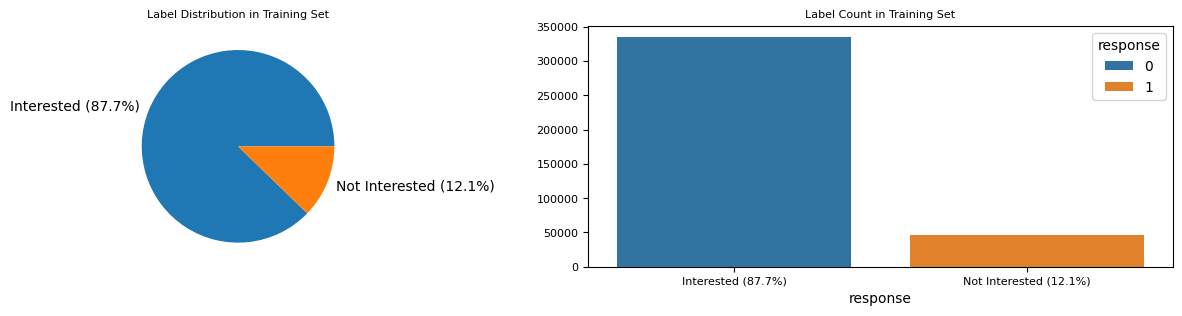

In [47]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

df.groupby('response').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Interested (87.7%)', 'Not Interested (12.1%)'])
sns.countplot(x = df['response'], hue = df['response'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Interested (87.7%)', 'Not Interested (12.1%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

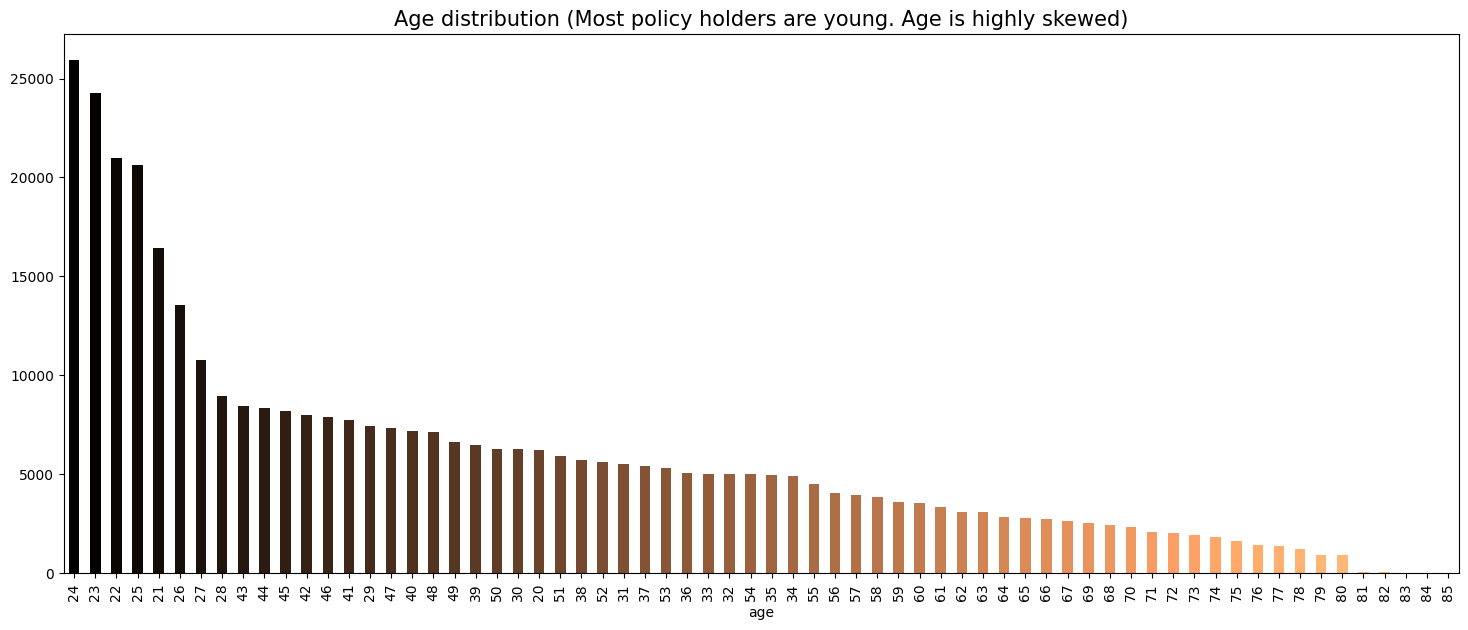

In [48]:
# looking at the frequency of records by age

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 66))
df['age'].value_counts().head(66).plot.bar(color = color)
plt.title('Age distribution (Most policy holders are young. Age is highly skewed)', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

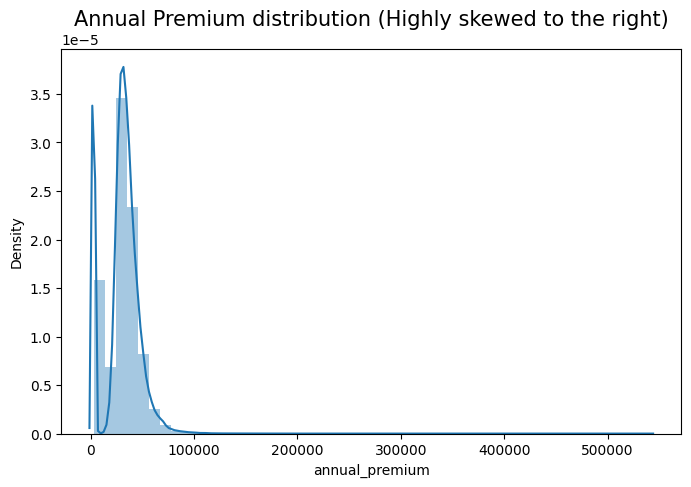

In [49]:
plt.figure(figsize = (8, 5))
sns.distplot(df['annual_premium'])
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

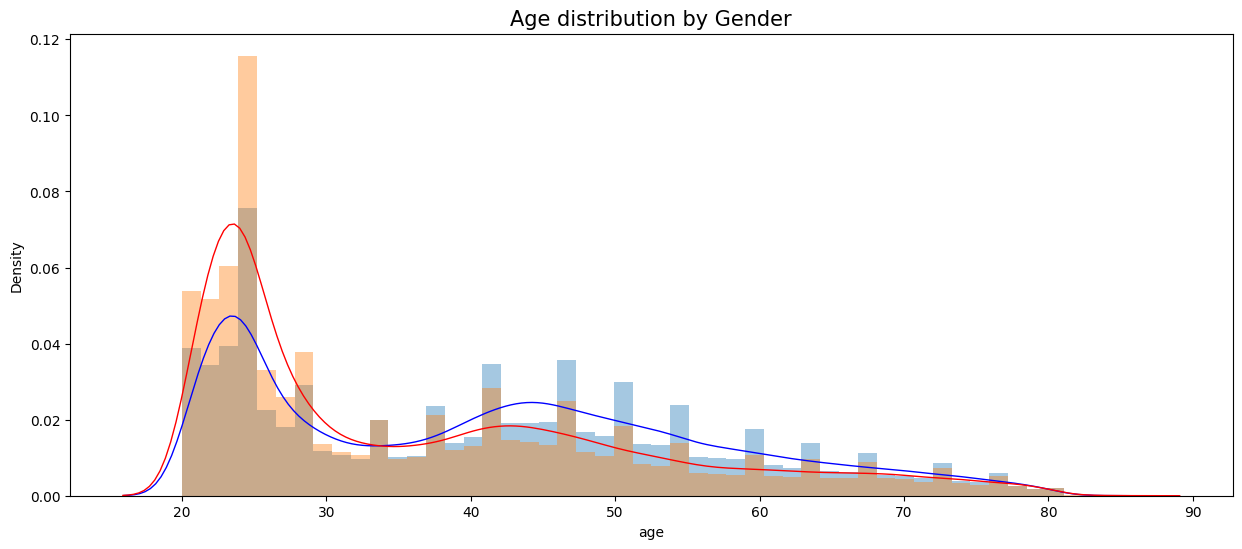

In [52]:
plt.figure(figsize = (15, 6))
sns.distplot(df.loc[(df['gender'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(df.loc[(df['gender'] == 1), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Age distribution by Gender', fontsize = 15)
plt.show()

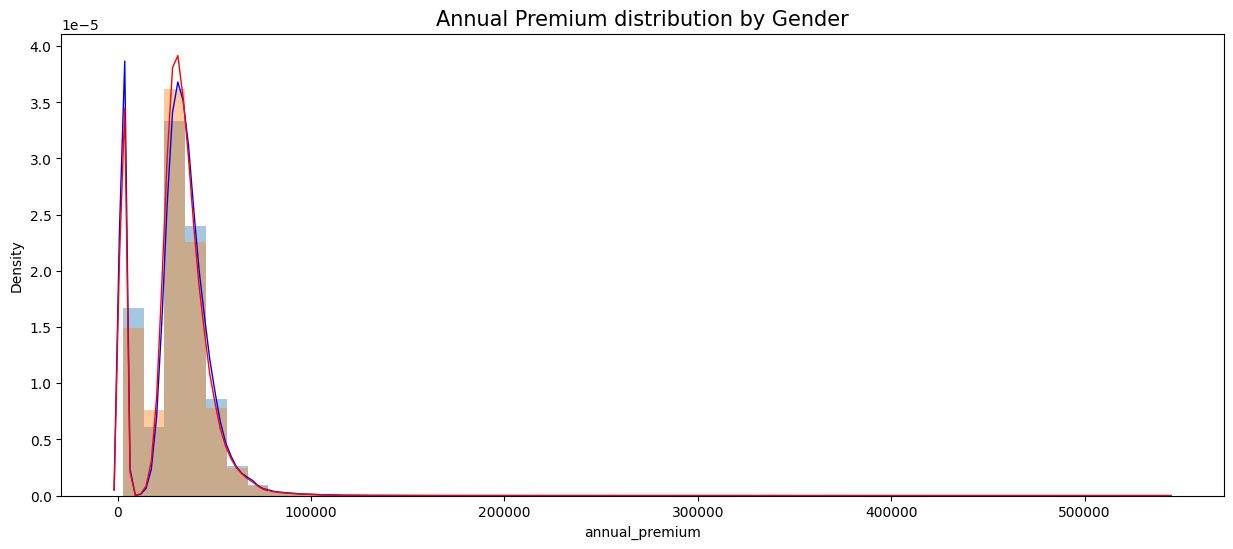

In [53]:
plt.figure(figsize = (15, 6))
sns.distplot(df.loc[(df['gender'] == 0), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Male"})
sns.distplot(df.loc[(df['gender'] == 1), 'annual_premium'], kde_kws = {"color": "r", "lw": 1, "label": "Female"})
plt.title('Annual Premium distribution by Gender', fontsize = 15)
plt.show()

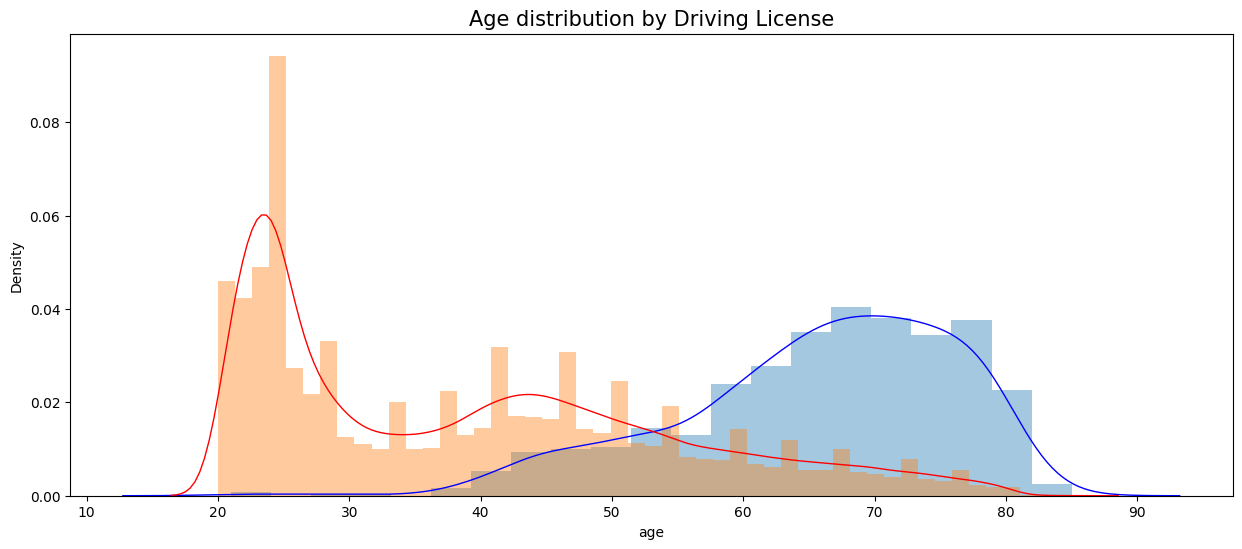

In [54]:
plt.figure(figsize = (15, 6))
sns.distplot(df.loc[(df['driving_license'] == 0), 'age'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(df.loc[(df['driving_license'] == 1), 'age'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Age distribution by Driving License', fontsize = 15)
plt.show()

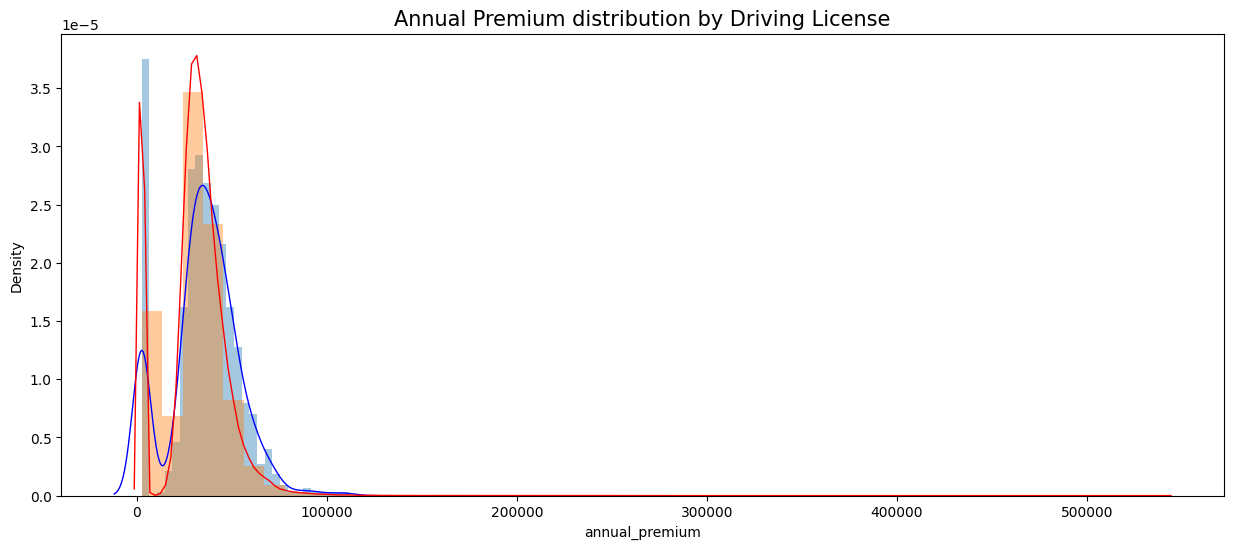

In [55]:
plt.figure(figsize = (15, 6))
sns.distplot(df.loc[(df['driving_license'] == 0), 'annual_premium'], kde_kws = {"color": "b", "lw": 1, "label": "Not Licensed for driving"})
sns.distplot(df.loc[(df['driving_license'] == 1), 'annual_premium'], kde_kws = {"color": "r", "lw": 1, "label": "Licensed for Driving"})
plt.title('Annual Premium distribution by Driving License', fontsize = 15)
plt.show()

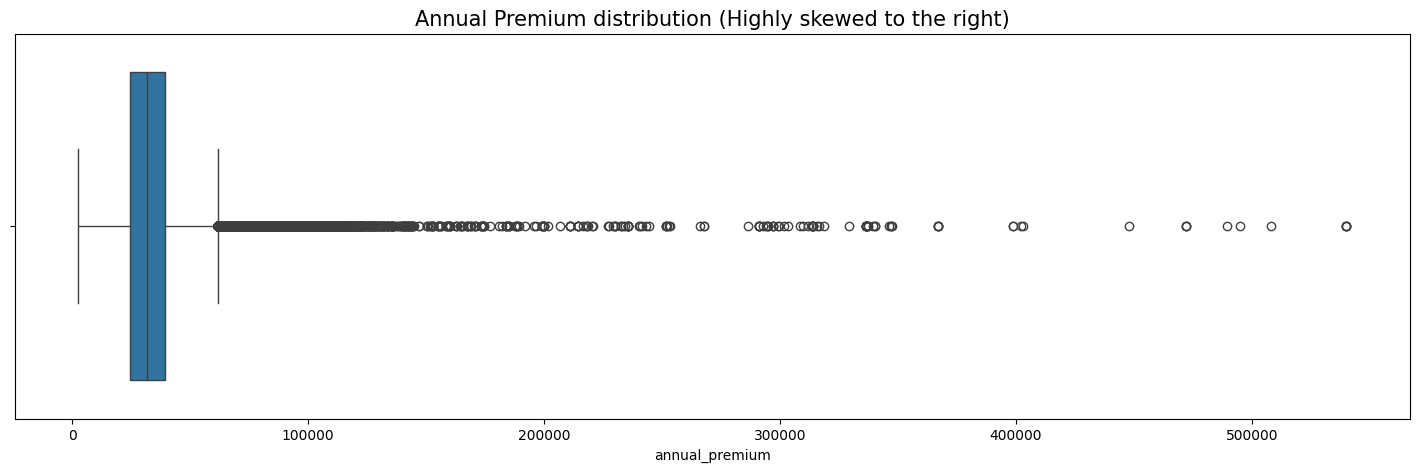

In [56]:
plt.figure(figsize = (18, 5))
sns.boxplot(df['annual_premium'], orient="h")
plt.title('Annual Premium distribution (Highly skewed to the right)', fontsize = 15)
plt.show()

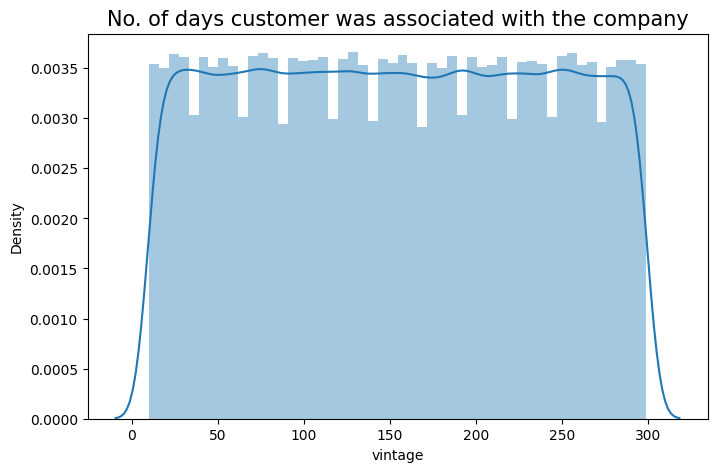

In [57]:
plt.figure(figsize = (8, 5))
sns.distplot(df['vintage'])
plt.title('No. of days customer was associated with the company', fontsize = 15)
plt.show()

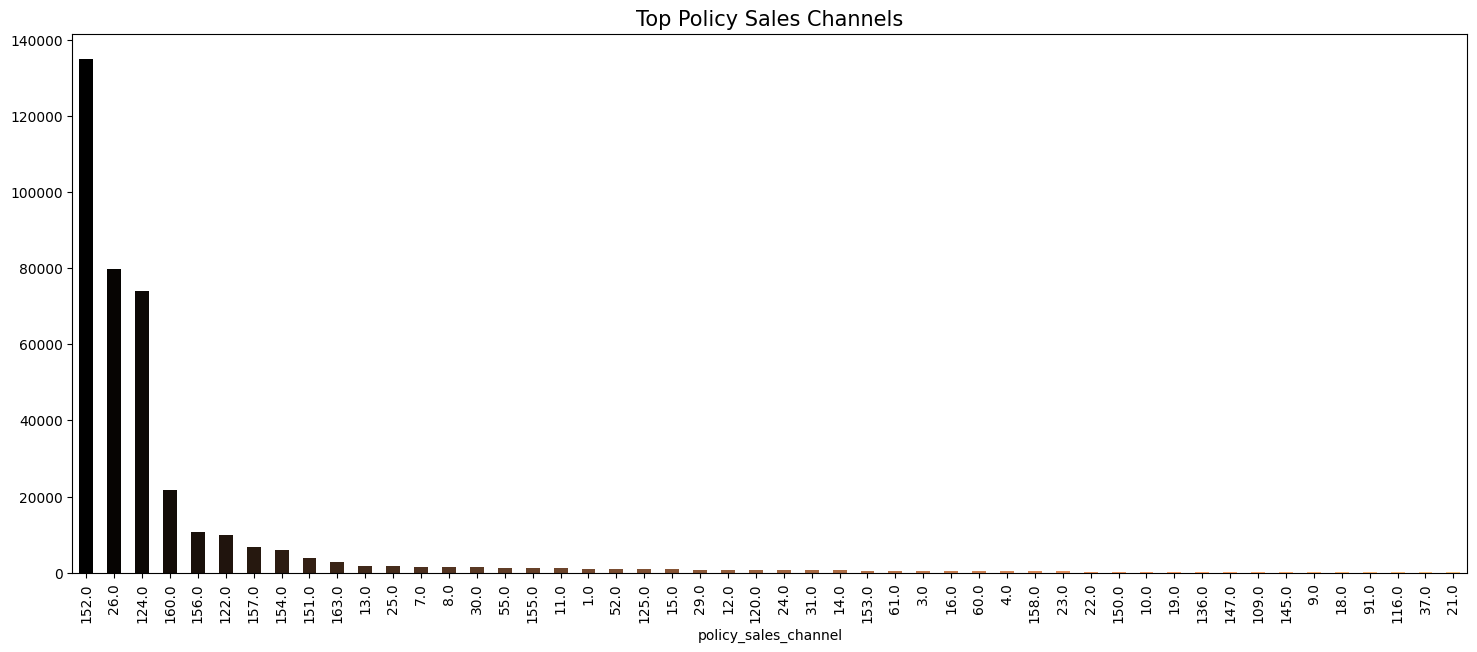

In [58]:
# looking at the frequency of records by age

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 50))
df['policy_sales_channel'].value_counts().head(50).plot.bar(color = color)
plt.title('Top Policy Sales Channels', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

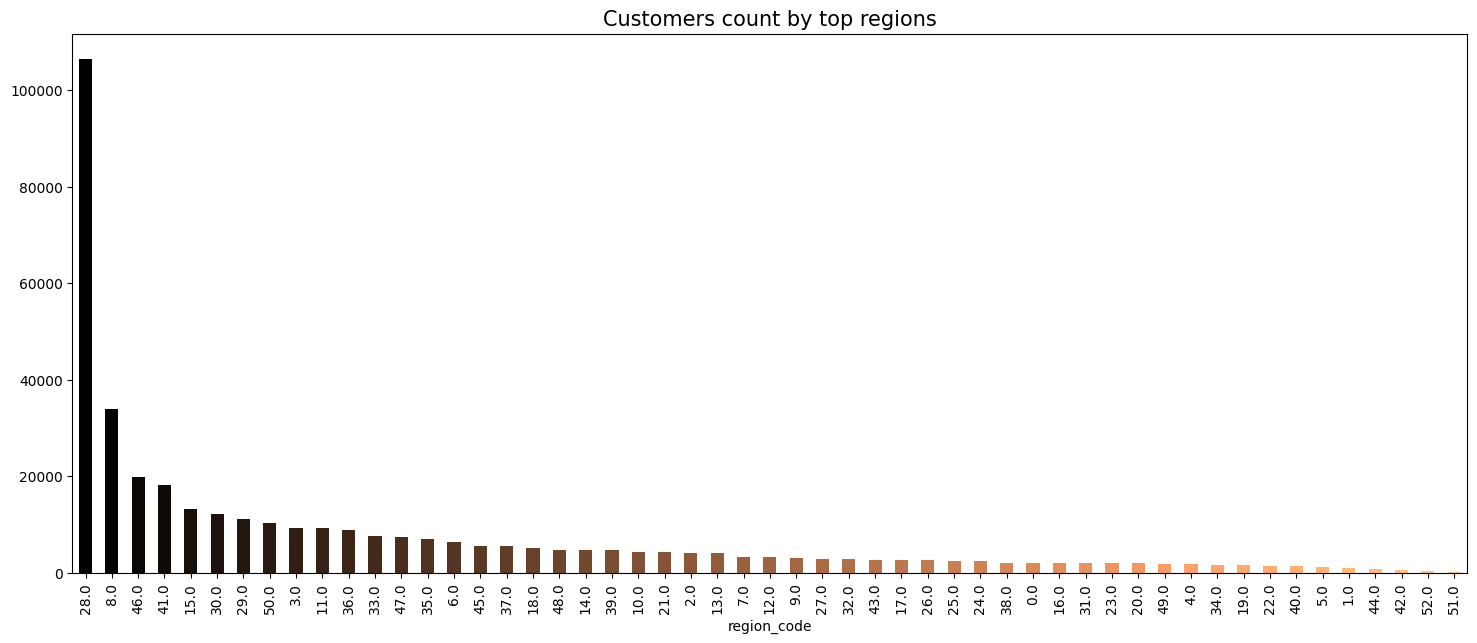

In [59]:
# looking at the frequency of records by sales channel

plt.rcParams['figure.figsize'] = (18, 7)
color = plt.cm.copper(np.linspace(0, 1, 53))
df['region_code'].value_counts().head(53).plot.bar(color = color)
plt.title('Customers count by top regions', fontsize = 15)
plt.xticks(rotation = 90)
plt.show()

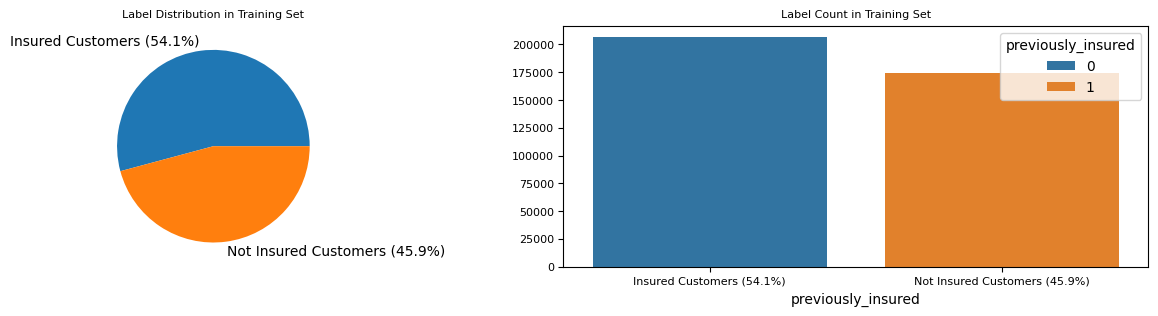

In [60]:
fig, axes = plt.subplots(ncols = 2, figsize = (13, 3), dpi = 100)
plt.tight_layout()

df.groupby('previously_insured').count()['id'].plot(kind = 'pie', ax = axes[0], labels = ['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])
sns.countplot(x = df['previously_insured'], hue = df['previously_insured'], ax = axes[1])

axes[0].set_ylabel('')
axes[1].set_ylabel('')
axes[1].set_xticklabels(['Insured Customers (54.1%)', 'Not Insured Customers (45.9%)'])
axes[0].tick_params(axis = 'x', labelsize = 8)
axes[0].tick_params(axis = 'y', labelsize = 8)
axes[1].tick_params(axis = 'x', labelsize = 8)
axes[1].tick_params(axis = 'y', labelsize = 8)

axes[0].set_title('Label Distribution in Training Set', fontsize = 8)
axes[1].set_title('Label Count in Training Set', fontsize =8)

plt.show()

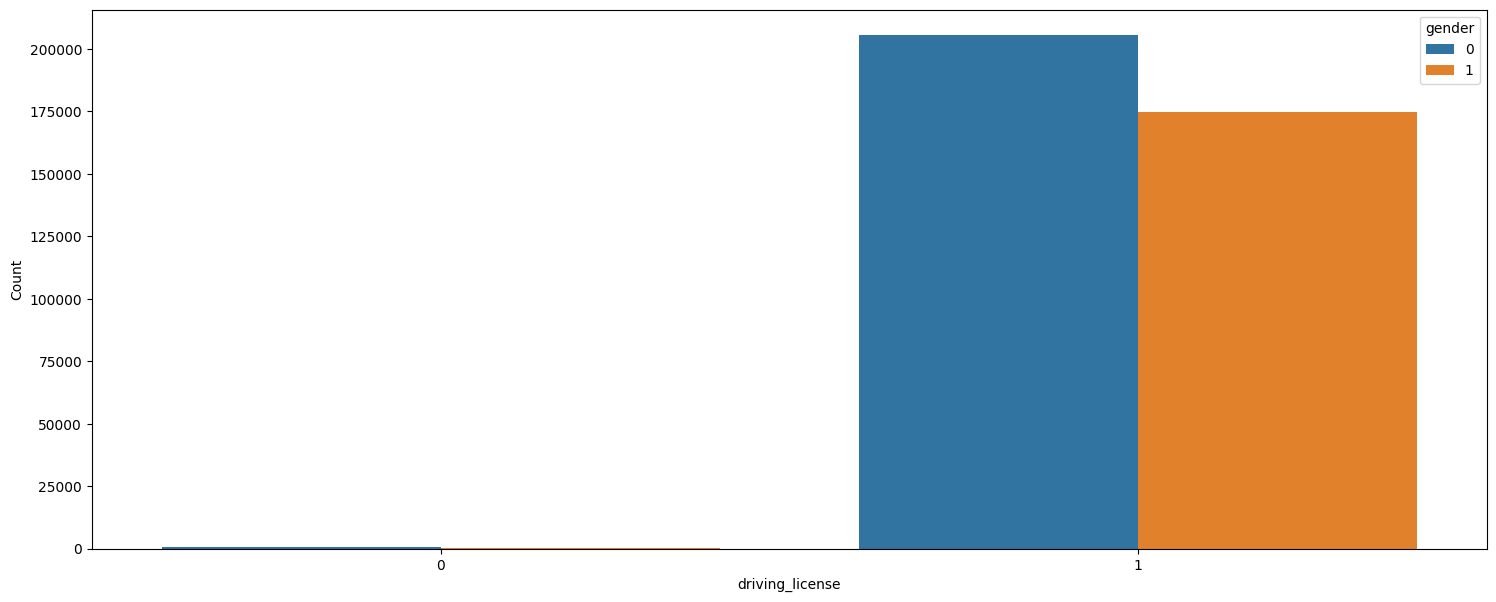

In [61]:
sns.countplot(data = df, x = 'driving_license', hue = 'gender')
plt.ylabel('Count')
plt.show()

MUTIVARIATE ANALYSIS USING PAIRPLOT

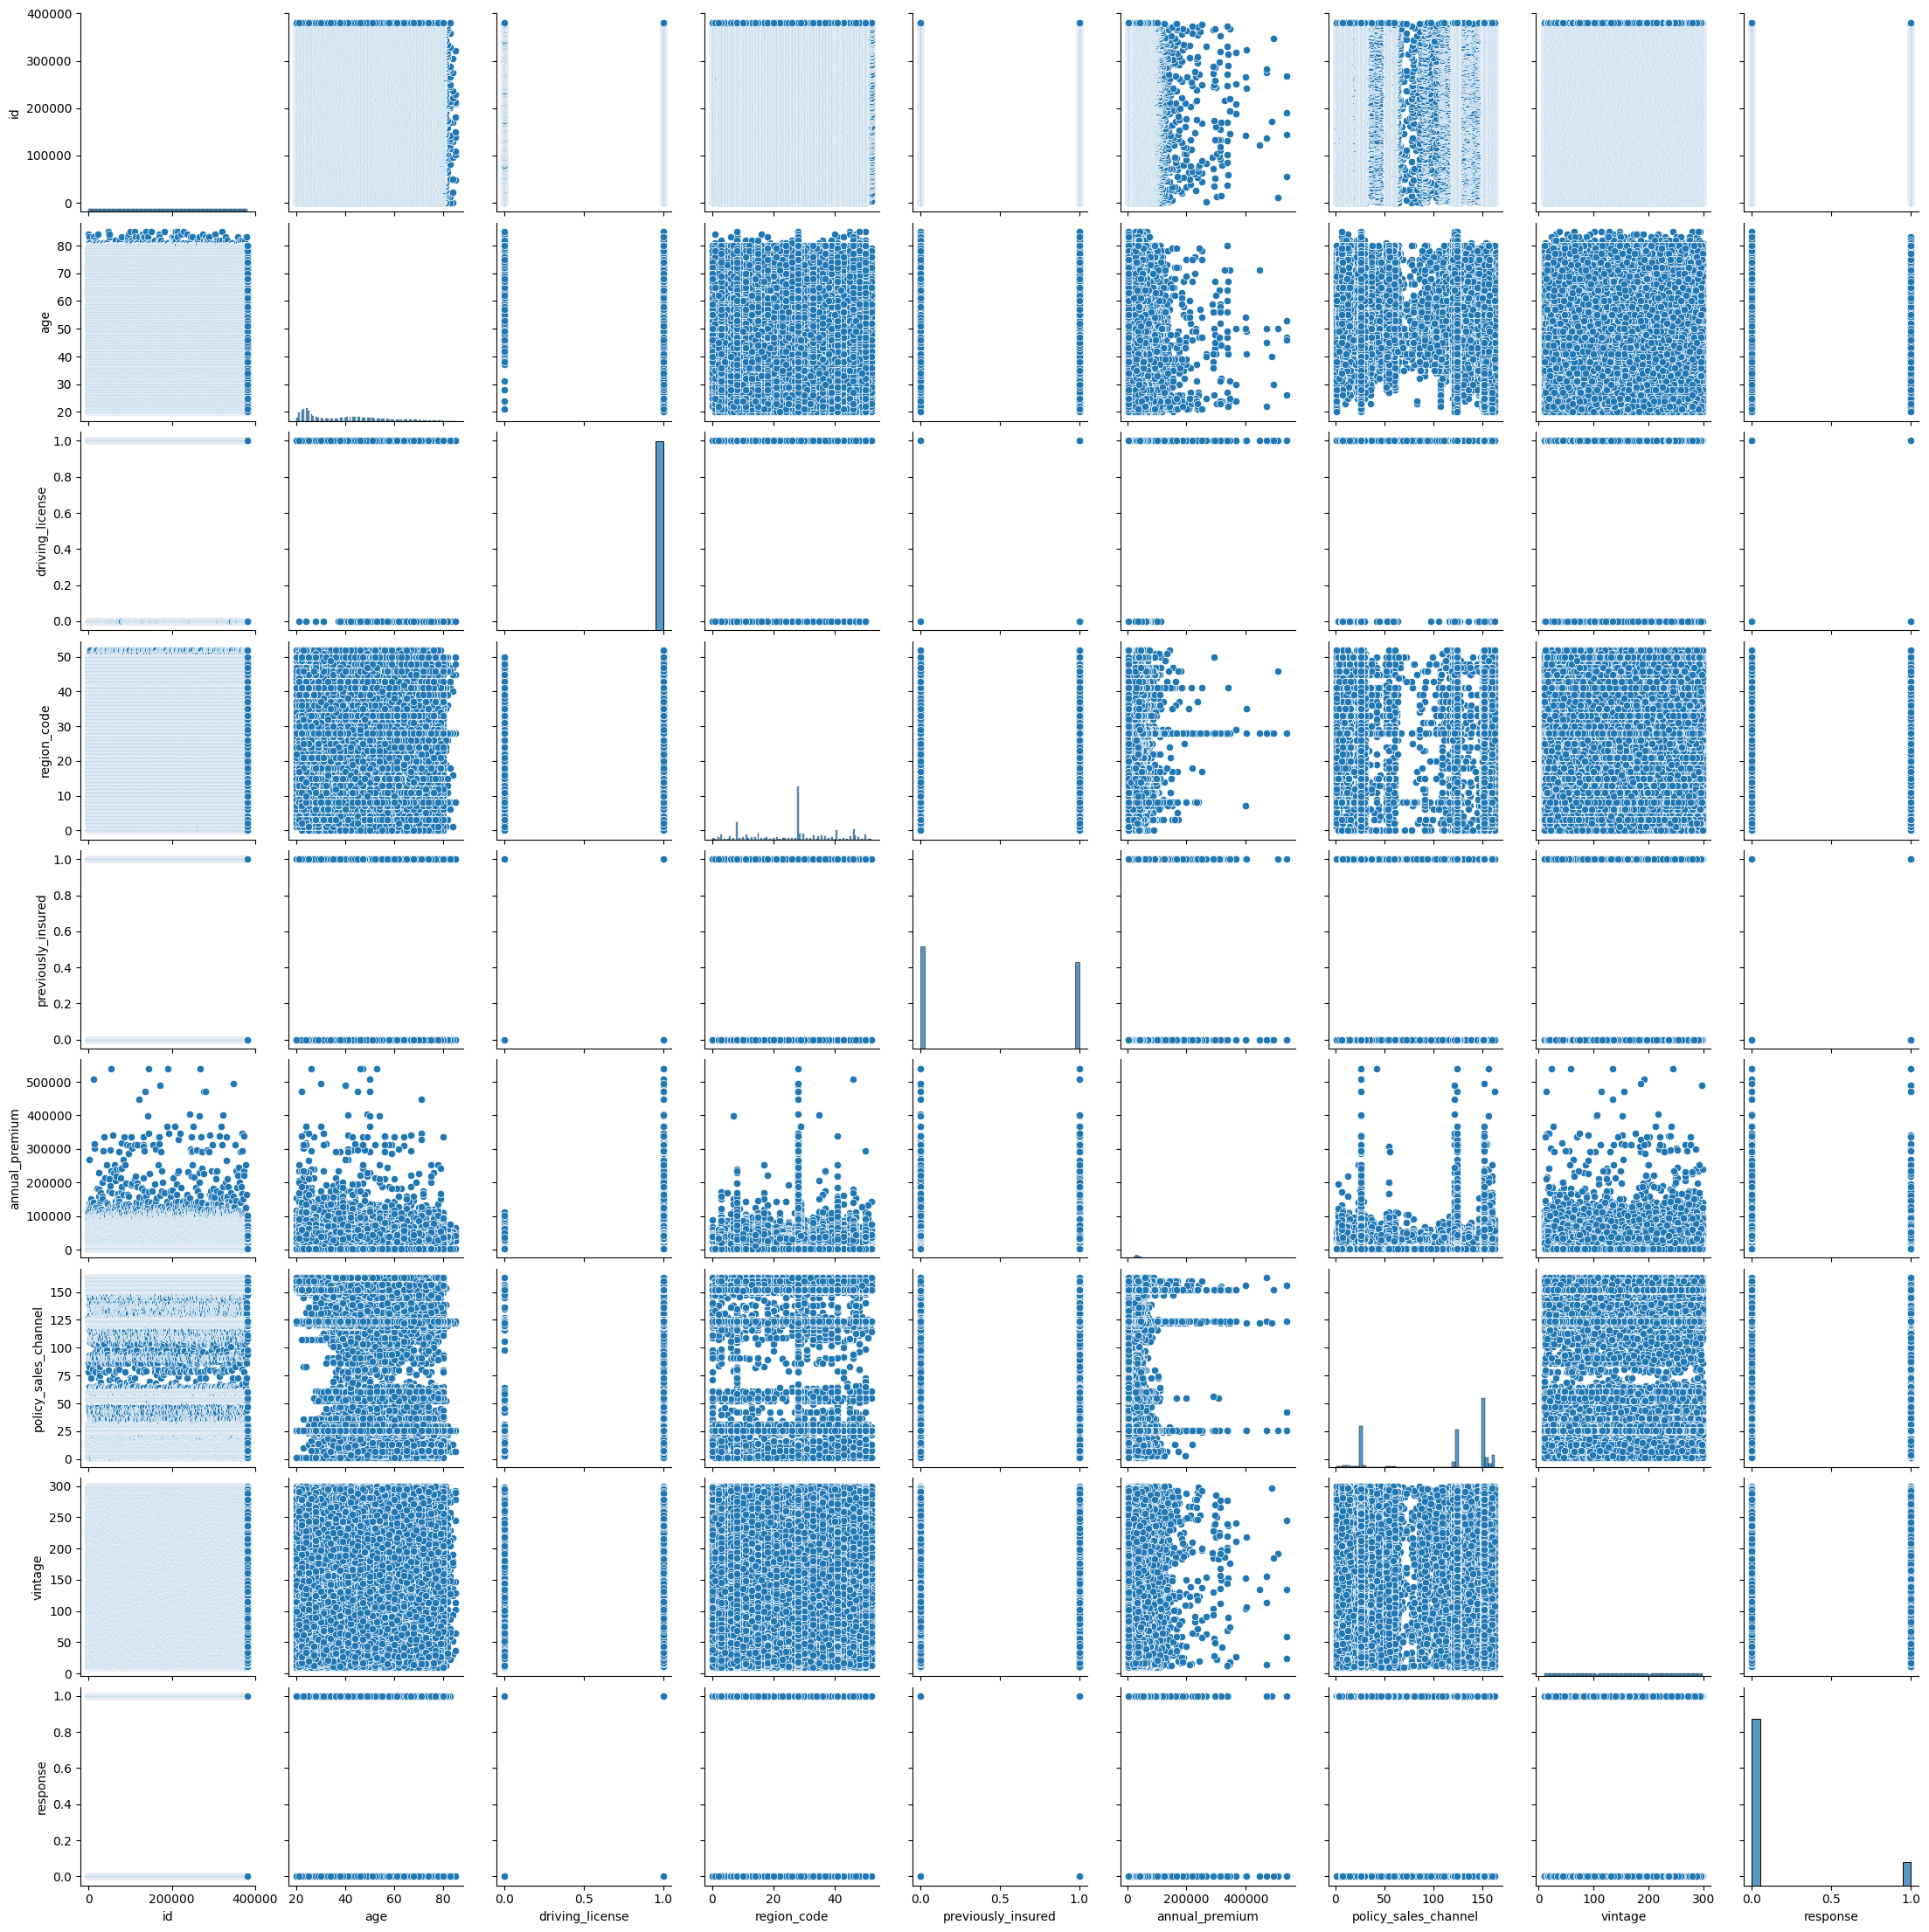

In [64]:
sns.pairplot(df[numeric_features])
plt.show()